# Математичні моделі в продуктовому маркетингу

## Сегментація і кластерний аналіз

###  Практична робота 2 (частина 2)

2.  Проведіть сегментацію клієнтів банку за допомогою кластерного аналізу:

    2.1. Завантажте датасет Kaggle Credit Card Dataset for Clustering https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
    
    2.2. Підготуйте і проаналізуйте дані.
    
    2.3. Побудуйте K-means або Hierarchical clustering model.
    
    2.4. Визначте і аргументуйте оптимальну кількість кластерів у моделі.
    
    2.5. Інтерпретуйте отримані результати з точки зору бізнесу і запропонуйте маркетингову стратегію.
    

**_Студентка Пороскун Олена. Група ПМ.м-21_**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('CC GENERAL.csv')
colnames = list(df.columns[1:-1])
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Обробка даних

In [5]:
df.drop(columns=['CUST_ID', 'TENURE'], inplace=True)

# заповнення нульових значень
df.fillna(df.mean(), inplace = True)

Зменшення розмiрностi методом головних компонент PCA (Principal Component Analysis)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(df)

# Reducing Dimensions
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

# Fit KMeans
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_pca)
pred = kmeans.predict(X_pca)

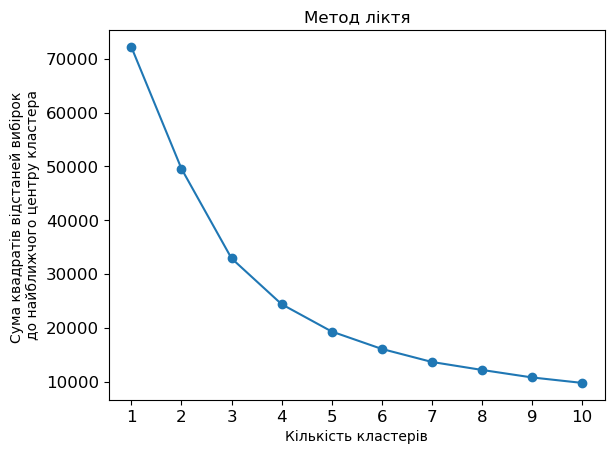

In [7]:
def fun_elbow(X_pca):
    inertias = []
    n=10
    for i in range(1,n+1):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X_pca)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1,11), inertias, marker='o')
    plt.title('Метод ліктя')
    plt.xlabel('Кількість кластерів')
    plt.ylabel('Сума квадратів відстаней вибірок \nдо найближчого центру кластера')
    plt.xticks(range(1, n+1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
fun_elbow(X_pca)

За методом "ліктя" визначили, що кластерів 4.

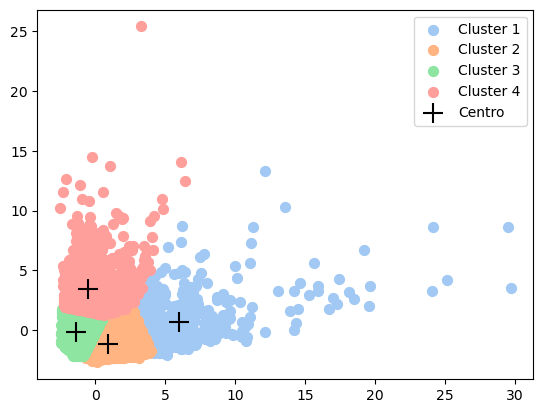

In [8]:
n_clusters = 4
colors = sns.color_palette('pastel')[0:n_clusters]
for i in range(n_clusters):
    plt.scatter(X_pca[pred == i, 0], X_pca[pred == i, 1], s = 50, label = 'Cluster ' + str(i + 1), color = colors[i])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, marker = '+', c = 'black', label = 'Centro')
plt.legend()
plt.show()

Так як у нас 4 кластери, до яких відносяться об'єкти вибірки, то можна розділити всіх клієнтів на 4 групи і пропонувати їм різні послуги. Зокрема, різні рівні підписок, різну таргетовану рекламу, різні товари і таке інше.

__________________________________________________________________________________________________________________________